In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Fri Apr 27 09:39:22 2018

@author: lhfcitylab
"""

import matplotlib.pyplot as plt

def plot_result(test_result,test_label1,path):
    ##all test result visualization
    fig1 = plt.figure(figsize=(7,1.5))
#    ax1 = fig1.add_subplot(1,1,1)
    a_pred = test_result[:,0]
    a_true = test_label1[:,0]
    plt.plot(a_pred,'r-',label='prediction')
    plt.plot(a_true,'b-',label='true')
    plt.legend(loc='best',fontsize=10)
    plt.savefig(path+'/test_all.jpg')
#    plt.show()
    ## oneday test result visualization
    fig1 = plt.figure(figsize=(7,1.5))
#    ax1 = fig1.add_subplot(1,1,1)
    a_pred = test_result[0:96,0]
    a_true = test_label1[0:96,0]
    plt.plot(a_pred,'r-',label="prediction")
    plt.plot(a_true,'b-',label="true")
    plt.legend(loc='best',fontsize=10)
    plt.savefig(path+'/test_oneday.jpg')
#    plt.show()

def plot_error(train_rmse,train_loss,test_rmse,test_acc,test_mae,path):
    ###train_rmse & test_rmse
    fig1 = plt.figure(figsize=(5,3))
    plt.plot(train_rmse, 'r-', label="train_rmse")
    plt.plot(test_rmse, 'b-', label="test_rmse")
    plt.legend(loc='best',fontsize=10)
    plt.savefig(path+'/rmse.jpg')
#    plt.show()
    #### train_loss & train_rmse
    fig1 = plt.figure(figsize=(5,3))
    plt.plot(train_loss,'b-', label='train_loss')
    plt.legend(loc='best',fontsize=10)
    plt.savefig(path+'/train_loss.jpg')
#    plt.show()
    #plt.close
    fig1 = plt.figure(figsize=(5,3))
    plt.plot(train_loss[150:],'b-', label='train_loss')
    plt.legend(loc='best',fontsize=10)
    plt.savefig(path+'/train_loss[150:].jpg')
#    plt.show()
    fig1 = plt.figure(figsize=(5,3))
    plt.plot(train_rmse,'b-', label='train_rmse')
    plt.legend(loc='best',fontsize=10)
    plt.savefig(path+'/train_rmse.jpg')
#    plt.show()
    fig1 = plt.figure(figsize=(5,3))
    plt.plot(train_rmse[150:],'b-', label='train_rmse')
    plt.legend(loc='best',fontsize=10)
    plt.savefig(path+'/train_rmse[150:].jpg')
#    plt.show()
    ##### test
    ### accuracy
    fig1 = plt.figure(figsize=(5,3))
    plt.plot(test_acc, 'b-', label="test_acc")
    plt.legend(loc='best',fontsize=10)
    plt.savefig(path+'/test_acc.jpg')
#    plt.show()
    fig1 = plt.figure(figsize=(5,3))
    plt.plot(test_acc[150:], 'b-', label="test_acc")
    plt.legend(loc='best',fontsize=10)
    plt.savefig(path+'/test_acc[150:].jpg')
#    plt.show()
    ### rmse
    fig1 = plt.figure(figsize=(5,3))
    plt.plot(test_rmse, 'b-', label="test_rmse")
    plt.legend(loc='best',fontsize=10)
    plt.savefig(path+'/test_rmse.jpg')
#    plt.show()
    fig1 = plt.figure(figsize=(5,3))
    plt.plot(test_rmse[150:], 'b-', label="test_rmse")
    plt.legend(loc='best',fontsize=10)
    plt.savefig(path+'/test_rmse[150:].jpg')
#    plt.show()
    ### mae
    fig1 = plt.figure(figsize=(5,3))
    plt.plot(test_mae, 'b-', label="test_mae")
    plt.legend(loc='best',fontsize=10)
    plt.savefig(path+'/test_mae.jpg')
#    plt.show()
    fig1 = plt.figure(figsize=(5,3))
    plt.plot(test_mae[150:], 'b-', label="test_mae")
    plt.legend(loc='best',fontsize=10)
    plt.savefig(path+'/test_mae[150:].jpg')
#    plt.show()

In [2]:
import numpy as np
import pandas as pd
import pickle as pkl

def preprocess_data(data, time_len, rate, seq_len, pre_len):
    train_size = int(time_len * rate)
    train_data = data[0:train_size]
    test_data = data[train_size:time_len]

    trainX, trainY, testX, testY = [], [], [], []
    for i in range(len(train_data) - seq_len - pre_len):
        a = train_data[i: i + seq_len + pre_len]
        trainX.append(a[0 : seq_len])
        trainY.append(a[seq_len : seq_len + pre_len])
    for i in range(len(test_data) - seq_len -pre_len):
        b = test_data[i: i + seq_len + pre_len]
        testX.append(b[0 : seq_len])
        testY.append(b[seq_len : seq_len + pre_len])

    trainX1 = np.array(trainX)
    trainY1 = np.array(trainY)
    testX1 = np.array(testX)
    testY1 = np.array(testY)
    return trainX1, trainY1, testX1, testY1

In [3]:
# -*- coding: utf-8 -*-

import tensorflow as tf
import scipy.sparse as sp
import numpy as np

def normalized_adj(adj):
    # Convert the adjacency matrix to a TensorFlow tensor
    adj = tf.convert_to_tensor(adj, dtype=tf.float32)

    # Calculate the row sum
    rowsum = tf.reduce_sum(adj, axis=1)

    # Calculate the inverse square root of the row sums
    d_inv_sqrt = 1.0 / tf.sqrt(tf.maximum(rowsum, 1e-12))  # Add a small constant to avoid division by zero

    # Create a diagonal matrix of the inverse square root
    d_mat_inv_sqrt = tf.linalg.diag(d_inv_sqrt)

    # Calculate the normalized adjacency matrix
    normalized_adj = tf.matmul(tf.matmul(d_mat_inv_sqrt,adj), d_mat_inv_sqrt)

    return normalized_adj
# def normalized_adj(adj):
#     adj = sp.coo_matrix(adj)
#     rowsum = np.array(adj.sum(1))
#     d_inv_sqrt = np.power(rowsum, -0.5).flatten()
#     d_inv_sqrt[np.isinf(d_inv_sqrt)] = 0.
#     d_mat_inv_sqrt = sp.diags(d_inv_sqrt)
#     normalized_adj = adj.dot(d_mat_inv_sqrt).transpose().dot(d_mat_inv_sqrt).tocoo()
#     normalized_adj = normalized_adj.astype(np.float32)
#     return normalized_adj
def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data, coo.shape)
def sparse_to_tuple(mx):
    mx = mx.tocoo()
    coords = np.vstack((mx.row, mx.col)).transpose()
    L = tf.SparseTensor(coords, mx.data, mx.shape)
    return tf.sparse.reorder(L)

def calculate_laplacian(adj, lambda_max=1):
    # print("adj",adj.shape)
    # adj = normalized_adj(adj + sp.eye(adj.shape[0]))
    adj = normalized_adj(adj + tf.eye(adj.shape[0], dtype=tf.float32))
    # adj = sp.csr_matrix(adj)
    # adj = adj.astype(np.float32)
    return adj

def weight_variable_glorot(input_dim, output_dim, name=""):
    init_range = np.sqrt(6.0 / (input_dim + output_dim))
    initial = tf.compat.v1.random_uniform([input_dim, output_dim], minval=-init_range,
                            maxval=init_range, dtype=tf.float32)

    return tf.Variable(initial,name=name)


In [4]:
import numpy as np
def pearson_correlation_coefficient(x, y):
    # print(x.shape)
    # Calculate the mean of x and y
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Calculate the covariance and variances
    cov_xy = np.sum((x - mean_x) * (y - mean_y))
    var_x = np.sum(np.square(x - mean_x))
    var_y = np.sum(np.square(y - mean_y))

    if var_x > 0 and var_y > 0:
        # Calculate the Pearson correlation coefficient
        pearson_corr = cov_xy / np.sqrt(var_x * var_y)
    else:
        # If variances are zero, correlation is undefined; return 0 or another appropriate value
        pearson_corr = 0.0  # You can change this to another value if needed

    return pearson_corr

In [5]:
# import numpy as np
# def dynamic_adjacency(x0,adj):
#         xy = x0.transpose(1,2,0)
#         xl = list(xy)
#         adjL = []

#         for x in range(len(xl)):
#           Acc = np.zeros((156, 156))
#           for i in range(156):
#             for j in range(156):
#               Acc[i][j] = np.abs(pearson_correlation_coefficient(xl[x][i],xl[x][j]))
#           Acc = 0.01 *Acc
#           Ac = np.round_(Acc, decimals = 3)
#           Ad = Ac+adj
#           adjL.append(Ad)

#         # ad = 0.1*adj
#         return adjL

In [6]:
def _nan_to_zero(x):
        is_not_nan = tf.math.logical_not(tf.math.is_nan(x))
        is_not_nan = tf.cast(is_not_nan, tf.float32)

        return tf.math.multiply_no_nan(x, is_not_nan)

In [7]:
import tensorflow as tf
import tensorflow_probability as tfp
def dynamic_adjacency(x0, adj):
    xy = x0.transpose(2,0,1)
    xyr = xy.reshape( xy.shape[0],-1)

    x0_tensor = tf.convert_to_tensor(xyr, dtype=tf.float32)
    adj_tensor = tf.convert_to_tensor(adj, dtype=tf.float32)
    # print(x0)
    # Calculate the Pearson correlation coefficients using TensorFlow operations
    xyr = x0_tensor  # Transpose to match TensorFlow broadcasting
    Acc = tf.abs(tfp.stats.correlation(xyr, xyr, sample_axis=1, event_axis=0))
    Acc = _nan_to_zero(Acc)
    Acc = 0.01 * Acc

    # Add Acc and adj tensors
    Ad = tf.add(Acc, adj_tensor)

    return Ad


In [8]:
import tensorflow as tf
from tensorflow.compat.v1.nn.rnn_cell import RNNCell
# from utils import calculate_laplacian

class tgcnCell(RNNCell):
    """Temporal Graph Convolutional Network """

    def call(self, inputs, **kwargs):
        pass

    def __init__(self, num_units,adj, node_embed,num_nodes, input_size=None,
                 act=tf.nn.tanh, reuse=None):

        super(tgcnCell, self).__init__(_reuse=reuse)
        self._act = act
        self._nodes = num_nodes
        self._units = num_units
        # self._adj = []
        # self.count = 0
        # print("adjtgcn",adj.shape)
        # for x in range(7):
        self._adj = (calculate_laplacian(adj))
        self.node_embed = node_embed


    @property
    def state_size(self):
        return self._nodes * self._units

    @property
    def output_size(self):
        return self._units

    def __call__(self, inputs,state, scope=None):


        with tf.compat.v1.variable_scope(scope or "tgcn"):
            with tf.compat.v1.variable_scope("gates"):
                # print("inputs1",inputs.shape)
                value = tf.nn.sigmoid(
                    self._gc(inputs, state, 2 * self._units, bias=1.0, scope=scope))
                # self.count = self.count+1
                # print("inputs",inputs.shape)
                r, u = tf.split(value=value, num_or_size_splits=2, axis=1)

            with tf.compat.v1.variable_scope("candidate"):
                r_state = r * state
                c = self._act(self._gc(inputs, r_state, self._units, scope=scope))
            new_h = u * state + (1 - u) * c
        return new_h, new_h


    def _gc(self, inputs, state, output_size, bias=0.0, scope=None):
        ## inputs:(-1,num_nodes)
        # print("inputs",inputs.shape)
        emd_dim = 10

        inputs = tf.expand_dims(inputs, 2)
        # print("inputs",inputs.shape)
        ## state:(batch,num_node,gru_units)
        state = tf.reshape(state, (-1, self._nodes, self._units))
        ## concat
        # print("state",state.shape)
        x_s = tf.concat([inputs, state], axis=2)
        input_size = x_s.get_shape()[2]
        weights_pool = tf.Variable(tf.random.normal([ emd_dim , input_size, output_size]), trainable=True)
        bias_pool = tf.Variable(tf.random.normal([ emd_dim , output_size]), trainable=True)
        weight = tf.einsum('nd,dio->nio',  self.node_embed, weights_pool)
        bias = tf.matmul( self.node_embed, bias_pool)
        x0 = tf.transpose(x_s, perm=[1, 2, 0])
        x0 = tf.reshape(x0, shape=[self._nodes, -1])

        scope = tf.compat.v1.get_variable_scope()
        with tf.compat.v1.variable_scope(scope):
            # for m in self._adj:
            x1 = tf.matmul(self._adj, x0)
            # print("xx1",x1.shape)
            x = tf.reshape(x1, shape=[self._nodes, input_size,-1])
            x = tf.transpose(x,perm=[2,0,1])
            x = tf.einsum('bni,nio->bno', x, weight)+bias
            # biases = tf.compat.v1.get_variable(
                # "biases", [output_size], initializer=tf.constant_initializer(bias))
            # x = tf.nn.bias_add(x, bias)
            x = tf.reshape(x, shape=[-1, self._nodes, output_size])
            x = tf.reshape(x, shape=[-1, self._nodes * output_size])
        return x

data (2976, 10)
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
s Tensor("mul:0", shape=(None, 3), dtype=float32)
bata Tensor("Softmax:0", shape=(None, 3), dtype=float32)
context Tensor("transpose_1:0", shape=(None, 10, 3), dtype=float32)
Iter:0 train_rmse:27.82 test_loss:857.2 test_rmse:0.4413 test_acc:-0.8015
INFO:tensorflow:out/tgcn_att\tgcn_att_sz_lr0.001_batch64_unit64_seq3_pre1_epoch200/model_100\graphGRU_pre_0-0.data-00000-of-00001
INFO:tensorflow:4600
INFO:tensorflow:out/tgcn_att\tgcn_att_sz_lr0.001_batch64_unit64_seq3_pre1_epoch200/model_100\graphGRU_pre_0-0.index
INFO:tensorflow:4600
INFO:tensorflow:out/tgcn_att\tgcn_att_sz_lr0.001_batch64_unit64_seq3_pre1_epoch200/model_100\graphGRU_pre_0-0.meta
INFO:tensorflow:5900
Iter:1 train_rmse:9.377 test_loss:359.1 test_rmse:0.168 test_acc:0.3143
Iter:2 train_rmse:6.372 test_loss:319.0 test_rmse:0.1278 test_acc:0.4783
Iter:3 train_rmse:5.549 test_loss:304.5 test_rmse:0.114 t

Iter:96 train_rmse:4.162 test_loss:156.8 test_rmse:0.07485 test_acc:0.6944
Iter:97 train_rmse:4.098 test_loss:155.8 test_rmse:0.07431 test_acc:0.6967
Iter:98 train_rmse:4.147 test_loss:155.2 test_rmse:0.07482 test_acc:0.6946
Iter:99 train_rmse:4.131 test_loss:154.3 test_rmse:0.07453 test_acc:0.6958
Iter:100 train_rmse:4.122 test_loss:153.5 test_rmse:0.07448 test_acc:0.696
Iter:101 train_rmse:4.143 test_loss:152.9 test_rmse:0.07491 test_acc:0.6942
Iter:102 train_rmse:4.088 test_loss:151.7 test_rmse:0.07376 test_acc:0.6989
Iter:103 train_rmse:4.169 test_loss:151.4 test_rmse:0.07497 test_acc:0.694
Iter:104 train_rmse:4.167 test_loss:150.4 test_rmse:0.07453 test_acc:0.6958
Iter:105 train_rmse:4.169 test_loss:149.9 test_rmse:0.07514 test_acc:0.6933
Iter:106 train_rmse:4.163 test_loss:148.9 test_rmse:0.07463 test_acc:0.6954
Iter:107 train_rmse:4.143 test_loss:148.0 test_rmse:0.07426 test_acc:0.6969
Iter:108 train_rmse:4.146 test_loss:147.3 test_rmse:0.07466 test_acc:0.6952
Iter:109 train_rms

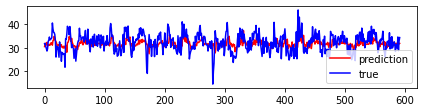

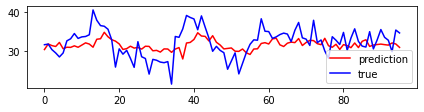

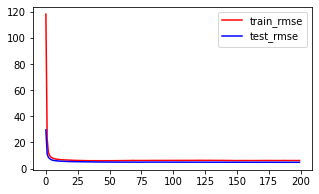

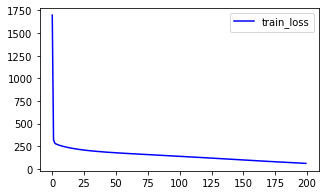

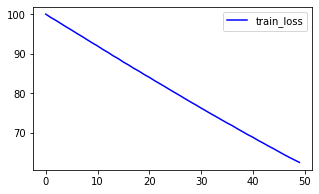

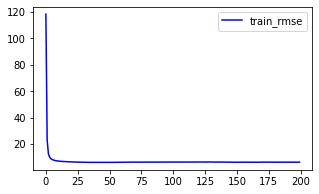

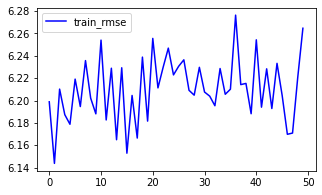

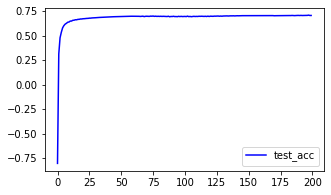

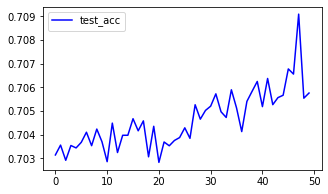

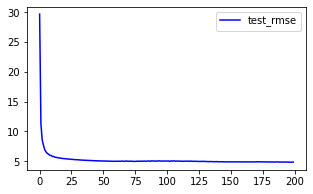

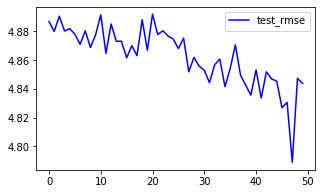

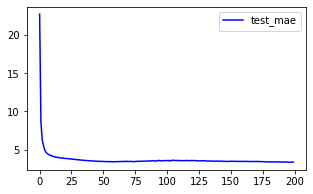

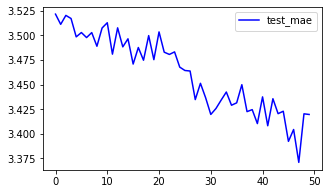

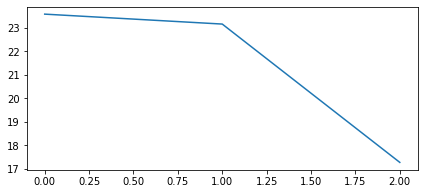

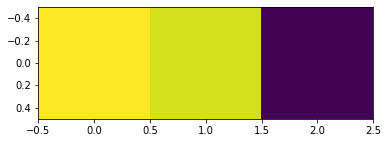

min_rmse:4.788807392060883 min_mae:3.3708615 max_acc:0.7090871632099152 r2:0.7258331179618835 var:0.7263023257255554


In [9]:
import pickle as pkl
import tensorflow as tf
import pandas as pd
import numpy as np
import math
import os
import numpy.linalg as la

# from input_data import preprocess_data,load_sz_data,load_los_data
# from tgcn import tgcnCell
# from gru import GRUCell
tf.compat.v1.reset_default_graph()
# from visualization import plot_result,plot_error
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import time
import scipy.stats as measures
time_start = time.time()
tf.compat.v1.enable_eager_execution()
train_rate =  0.8
seq_len = 3
output_dim = pre_len =1
lr = 0.001
training_epoch = 200
batch_size = 64
# training_epoch = 1
gru_units = 64

###### load data ######
# if data_name == 'sz':
#     data, adj = load_sz_data('sz')
# if data_name == 'los':
#     data, adj = load_los_data('los')
los_adj = pd.read_csv('C:/Users/Afia/Downloads/sz_adj.csv',header=None)
adj = np.mat(los_adj)
adj = adj[:10,:10]
data = pd.read_csv('C:/Users/Afia/Downloads/sz_speed.csv')
data1 =np.mat(data,dtype=np.float32)
data1 = data1[:,:10]
print("data",data1.shape)
time_len = data1.shape[0]
num_nodes = data1.shape[1]
#### normalization
max_value = np.max(data1)
data1  = data1/max_value
trainX, trainY, testX, testY = preprocess_data(data1, time_len, train_rate, seq_len, pre_len)
emd_dim = 10
totalbatch = int(trainX.shape[0]/batch_size)
training_data_count = len(trainX)

def TGCN(_X, Adj_m,weights, biases):
    ###
    node_embeddings = tf.Variable(tf.random.normal((num_nodes, 10)), trainable=True)
      # weights_pool = tf.Variable(tf.random.normal([ emd_dim , input_size, output_size]), trainable=True)
      #   bias_pool = tf.Variable(tf.random.normal([ emd_dim , output_size]), trainable=True)
    weight = tf.einsum('nd,dio->nio',  node_embeddings, weights)
    bias = tf.matmul(node_embeddings, biases)
    cell_1 = tgcnCell(gru_units,Adj_m, node_embeddings,num_nodes=num_nodes)
    cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell([cell_1], state_is_tuple=True)
    _X = tf.unstack(_X, axis=1)
    # Adj_m = tf.unstack(Adj_m, axis=1)
    outputs, states = tf.compat.v1.nn.static_rnn(cell, _X, dtype=tf.float32)
    out = tf.concat(outputs, axis=0)
    out = tf.reshape(out, shape=[seq_len,-1,num_nodes,gru_units])
    out = tf.transpose(out, perm=[1,0,2,3])

    last_output,alpha = self_attention1(out, weight_att, bias_att)
    # print("last_output",last_output.shape)
    # output = tf.reshape(last_output,shape=[-1,seq_len])
    output = tf.einsum('bni,nio->bno', last_output, weight)+bias
    # output = tf.matmul(output, weights['out']) + biases['out']
    output = tf.reshape(output,shape=[-1,num_nodes,pre_len])
    output = tf.transpose(output, perm=[0,2,1])
    output = tf.reshape(output, shape=[-1,num_nodes])

    return output, outputs, states, alpha

def self_attention1(x, weight_att,bias_att):
    x = tf.matmul(tf.reshape(x,[-1,gru_units]),weight_att['w1']) + bias_att['b1']
    f = tf.matmul(tf.reshape(x, [-1, num_nodes]), weight_att['w2']) + bias_att['b2']
    g = tf.matmul(tf.reshape(x, [-1, num_nodes]), weight_att['w2']) + bias_att['b2']
    h = tf.matmul(tf.reshape(x, [-1, num_nodes]), weight_att['w2']) + bias_att['b2']

    f1 = tf.reshape(f, [-1,seq_len])
    g1 = tf.reshape(g, [-1,seq_len])
    h1 = tf.reshape(h, [-1,seq_len])
    s = g1 * f1
    print('s',s)

    beta = tf.nn.softmax(s, axis=-1)  # attention map
    print('bata',beta)
    context = tf.expand_dims(beta,2) * tf.reshape(x,[-1,seq_len,num_nodes])

    context = tf.transpose(context,perm=[0,2,1])
    print('context', context)
    return context, beta
def self_attention(x, ch, weight_att, bias_att):
    f = tf.matmul(tf.reshape(x, [-1, gru_units]), weight_att['w'])
    g = tf.matmul(tf.reshape(x, [-1, gru_units]), weight_att['w']) + bias_att['b_att']
    h = tf.matmul(tf.reshape(x, [-1, gru_units]), weight_att['w']) + bias_att['b_att']
    print('h',h)

    f = tf.reshape(f, [-1,num_nodes])
    g = tf.reshape(g, [-1,num_nodes])
    h = tf.reshape(h, [-1,num_nodes])
    s = g * f
    print('s',s)

    beta = tf.nn.softmax(s, axis=-1)  # attention map
    print('bata',beta)
    o = beta * h
    print('o',o)
    gamma = tf.compat.v1.get_variable("gamma", [1], initializer=tf.constant_initializer(0))

    o = tf.expand_dims(o, 2)
    x = gamma * o + x
    print('x',x)
#   x = tf.reduce_sum(x, 2)
    return x, beta
###### placeholders ######
tf.compat.v1.disable_eager_execution()
inputs = tf.compat.v1.placeholder(tf.float32, shape=[None, seq_len, num_nodes])
labels = tf.compat.v1.placeholder(tf.float32, shape=[None, pre_len, num_nodes])
# Adj_m = tf.compat.v1.placeholder(tf.float32, shape=[7,num_nodes, num_nodes])
Adj_m = tf.compat.v1.placeholder(tf.float32, shape=[num_nodes, num_nodes])
# weights
# weights = {
#     'out': tf.Variable(tf.compat.v1.random_normal([seq_len, pre_len], mean=1.0), name='weight_o')}
# bias = {
#     'out': tf.Variable(tf.compat.v1.random_normal([pre_len]),name='bias_o')}

weights_pool = tf.Variable(tf.random.normal([ emd_dim , seq_len, pre_len]), trainable=True)
bias_pool = tf.Variable(tf.random.normal([ emd_dim , pre_len]), trainable=True)
weight_att={
    'w1':tf.Variable(tf.compat.v1.random_normal([gru_units,1], stddev=0.1),name='att_w1'),
    'w2':tf.Variable(tf.compat.v1.random_normal([num_nodes,1], stddev=0.1),name='att_w2')}
bias_att = {
    'b1': tf.Variable(tf.compat.v1.random_normal([1]),name='att_b1'),
    'b2': tf.Variable(tf.compat.v1.random_normal([1]),name='att_b2')}

# if model_name == 'TGCN_att':
pred,ttto,ttts,alpha = TGCN(inputs,Adj_m, weights_pool, bias_pool)
y_pred = pred


###### optimizer ######
lambda_loss = 0.0015
Lreg = lambda_loss * sum(tf.nn.l2_loss(tf_var) for tf_var in tf.compat.v1.trainable_variables())
label = tf.reshape(labels, [-1,num_nodes])
##loss
loss = tf.reduce_mean(tf.nn.l2_loss(y_pred-label) + Lreg)
##rmse
error = tf.sqrt(tf.reduce_mean(tf.square(y_pred-label)))
optimizer = tf.compat.v1.train.AdamOptimizer(lr).minimize(loss)

###### Initialize session ######
variables = tf.compat.v1.global_variables()
saver = tf.compat.v1.train.Saver(tf.compat.v1.global_variables())
#sess = tf.Session()
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))
sess.run(tf.compat.v1.global_variables_initializer())

#out = 'out/%s'%(model_name)
out = 'out/%s'%('tgcn_att')
path1 = '%s_%s_lr%r_batch%r_unit%r_seq%r_pre%r_epoch%r'%('tgcn_att','sz',lr,batch_size,gru_units,seq_len,pre_len,training_epoch)
path = os.path.join(out,path1)
if not os.path.exists(path):
    os.makedirs(path)

###### evaluation ######
def evaluation(a,b):
    rmse = math.sqrt(mean_squared_error(a,b))
    mae = mean_absolute_error(a, b)
    F_norm = la.norm(a-b,'fro')/la.norm(a,'fro')
    r2 = 1-((a-b)**2).sum()/((a-a.mean())**2).sum()
    var = 1-(np.var(a-b))/np.var(a)
    return rmse, mae, 1-F_norm, r2, var

def extract_batch_size(_train, step, batch_size):
    # Function to fetch a "batch_size" amount of data from "(X|y)_train" data.
    shape = list(_train.shape)
    shape[0] = batch_size
    batch_s = np.empty(shape)
    for i in range(batch_size):
        # Loop index
        index = ((step-1)*batch_size + i) % len(_train)
        batch_s[i] = _train[index]
    return batch_s


x_axe,batch_loss,batch_rmse,batch_pred = [], [], [], []
test_loss,test_rmse,test_mae,test_acc,test_r2,test_var,test_pred = [],[],[],[],[],[],[]
Ad_adjt = dynamic_adjacency(testX,adj)
add_adjt = sess.run(Ad_adjt)
add_adjt = np.array(add_adjt)
for epoch in range(training_epoch):
    for m in range(totalbatch):
        mini_batch = trainX[m * batch_size : (m+1) * batch_size]
        mini_label = trainY[m * batch_size : (m+1) * batch_size]
        # print("Adj...",adj.shape,adj)
        Ad_adj = dynamic_adjacency(mini_batch,adj)

        add_adj = sess.run(Ad_adj)
        add_adj = np.array(add_adj)
        # print("Ad Adj...",add_adj.shape,add_adj)
        _, loss1, rmse1, train_output, alpha1 = sess.run([optimizer, loss, error, y_pred, alpha],
                                                 feed_dict = {inputs:mini_batch,Adj_m:add_adj ,labels:mini_label})
        # print("train_output",train_output)
        # rmse1, mae1, acc1, r2_score1, var_score1 = evaluation(mini_label, train_output)
        # print("predicted value",train_output)
        batch_loss.append(loss1)
        batch_rmse.append(rmse1 * max_value)

     # Test completely at every epoch
    loss2, rmse2, test_output = sess.run([loss, error, y_pred],feed_dict = {inputs:testX, Adj_m:add_adjt ,labels:testY})
    test_label = np.reshape(testY,[-1,num_nodes])
    rmse, mae, acc, r2_score, var_score = evaluation(test_label, test_output)
    test_label1 = test_label * max_value
    test_output1 = test_output * max_value
    test_loss.append(loss2)
    test_rmse.append(rmse * max_value)
    test_mae.append(mae * max_value)

    test_acc.append(acc)
    test_r2.append(r2_score)
    test_var.append(var_score)
    test_pred.append(test_output1)

    print('Iter:{}'.format(epoch),
          'train_rmse:{:.4}'.format(batch_rmse[-1]),
          'test_loss:{:.4}'.format(loss2),
          'test_rmse:{:.4}'.format(rmse),
          'test_acc:{:.4}'.format(acc))

    if (epoch % 500 == 0):
        saver.save(sess, path+'/model_100/graphGRU_pre_%r'%epoch, global_step = epoch)

time_end = time.time()
print(time_end-time_start,'s')

############## visualization ###############
#x = [i for i in range(training_epoch)]
b = int(len(batch_rmse)/totalbatch)
batch_rmse1 = [i for i in batch_rmse]
train_rmse = [(sum(batch_rmse1[i*totalbatch:(i+1)*totalbatch])/totalbatch) for i in range(b)]
batch_loss1 = [i for i in batch_loss]
train_loss = [(sum(batch_loss1[i*totalbatch:(i+1)*totalbatch])/totalbatch) for i in range(b)]
#test_rmse = [float(i) for i in test_rmse]
var = pd.DataFrame(batch_loss1)
var.to_csv(path+'/batch_loss.csv',index = False,header = False)
var = pd.DataFrame(train_loss)
var.to_csv(path+'/train_loss.csv',index = False,header = False)
var = pd.DataFrame(batch_rmse1)
var.to_csv(path+'/batch_rmse.csv',index = False,header = False)
var = pd.DataFrame(train_rmse)
var.to_csv(path+'/train_rmse.csv',index = False,header = False)
var = pd.DataFrame(test_loss)
var.to_csv(path+'/test_loss.csv',index = False,header = False)
var = pd.DataFrame(test_acc)
var.to_csv(path+'/test_acc.csv',index = False,header = False)
var = pd.DataFrame(test_rmse)
var.to_csv(path+'/test_rmse.csv',index = False,header = False)


index = test_rmse.index(np.min(test_rmse))
test_result = test_pred[index]
var = pd.DataFrame(test_result)
var.to_csv(path+'/test_result.csv',index = False,header = False)
plot_result(test_result,test_label1,path)
plot_error(train_rmse,train_loss,test_rmse,test_acc,test_mae,path)

fig1 = plt.figure(figsize=(7,3))
ax1 = fig1.add_subplot(1,1,1)
plt.plot(np.sum(alpha1,0))
plt.savefig(path+'/alpha.jpg',dpi=500)
plt.show()


plt.imshow(np.mat(np.sum(alpha1,0)))
plt.savefig(path+'/alpha11.jpg',dpi=500)
plt.show()

print('min_rmse:%r'%(np.min(test_rmse)),
      'min_mae:%r'%(test_mae[index]),
      'max_acc:%r'%(test_acc[index]),
      'r2:%r'%(test_r2[index]),
      'var:%r'%test_var[index])